In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [12]:
features_data = pd.read_csv('../data/features/stage_1_features.csv')
features = [
    'distance2mean', 'trend_measure', 'leave_one_out_score', 'distance_rdw',
    'question_pool', 'longitudinal_prop', 'distance2edition'
]

In [13]:
features_data.head(10)

,country,edition,unid,dropped,distance2mean,trend_measure,leave_one_out_score,distance_rdw,question_pool,longitudinal_prop,distance2edition
0,Afghanistan,2020,2020_cc_English_0_1420,0,-0.039035,-0.002706,-0.000976,0.000057,11,0.000000,0
1,Afghanistan,2020,2020_cc_English_0_240_2018,0,0.016263,-0.002800,0.000407,-0.000024,11,0.000000,1
2,Afghanistan,2020,2020_cc_English_0_242_2018,0,-0.077887,0.001018,-0.001947,0.000113,11,0.000000,1
3,Afghanistan,2020,2020_cc_English_1_1384,0,0.081722,0.004993,0.002043,-0.000119,11,0.390244,0
4,Afghanistan,2020,2020_cc_English_1_1633,0,0.069082,0.002820,0.001727,-0.000100,11,0.390244,0
5,Afghanistan,2020,2020_cc_English_1_202_2017_2018,0,-0.064387,-0.000618,-0.001610,0.000094,11,0.000000,2
6,Afghanistan,2020,2020_cc_English_1_216,0,-0.166734,0.020881,-0.004168,0.000242,11,0.390244,0
7,Afghanistan,2020,2020_cc_English_1_310,0,0.044351,-0.000506,0.001109,-0.000064,11,0.390244,0
8,Afghanistan,2020,2020_cc_English_1_616_2018,0,0.008030,-0.003174,0.000201,-0.000012,11,0.000000,1
9,Afghanistan,2020,2020_cc_English_1_618_2018,0,-0.014761,-0.003500,-0.000369,0.000021,11,0.000000,1


In [14]:
features_data.dropped.value_counts()

dropped
0    41921
1     1938
Name: count, dtype: int64

<Axes: xlabel='dropped', ylabel='count'>

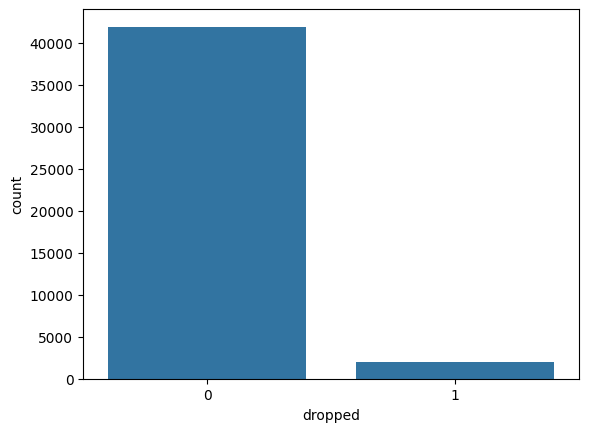

In [15]:
sns.countplot(
    features_data,
    x = 'dropped'
)

In [16]:
features_data.isnull().sum()

country                0
edition                0
unid                   0
dropped                0
distance2mean          0
trend_measure          0
leave_one_out_score    0
distance_rdw           0
question_pool          0
longitudinal_prop      0
distance2edition       0
dtype: int64

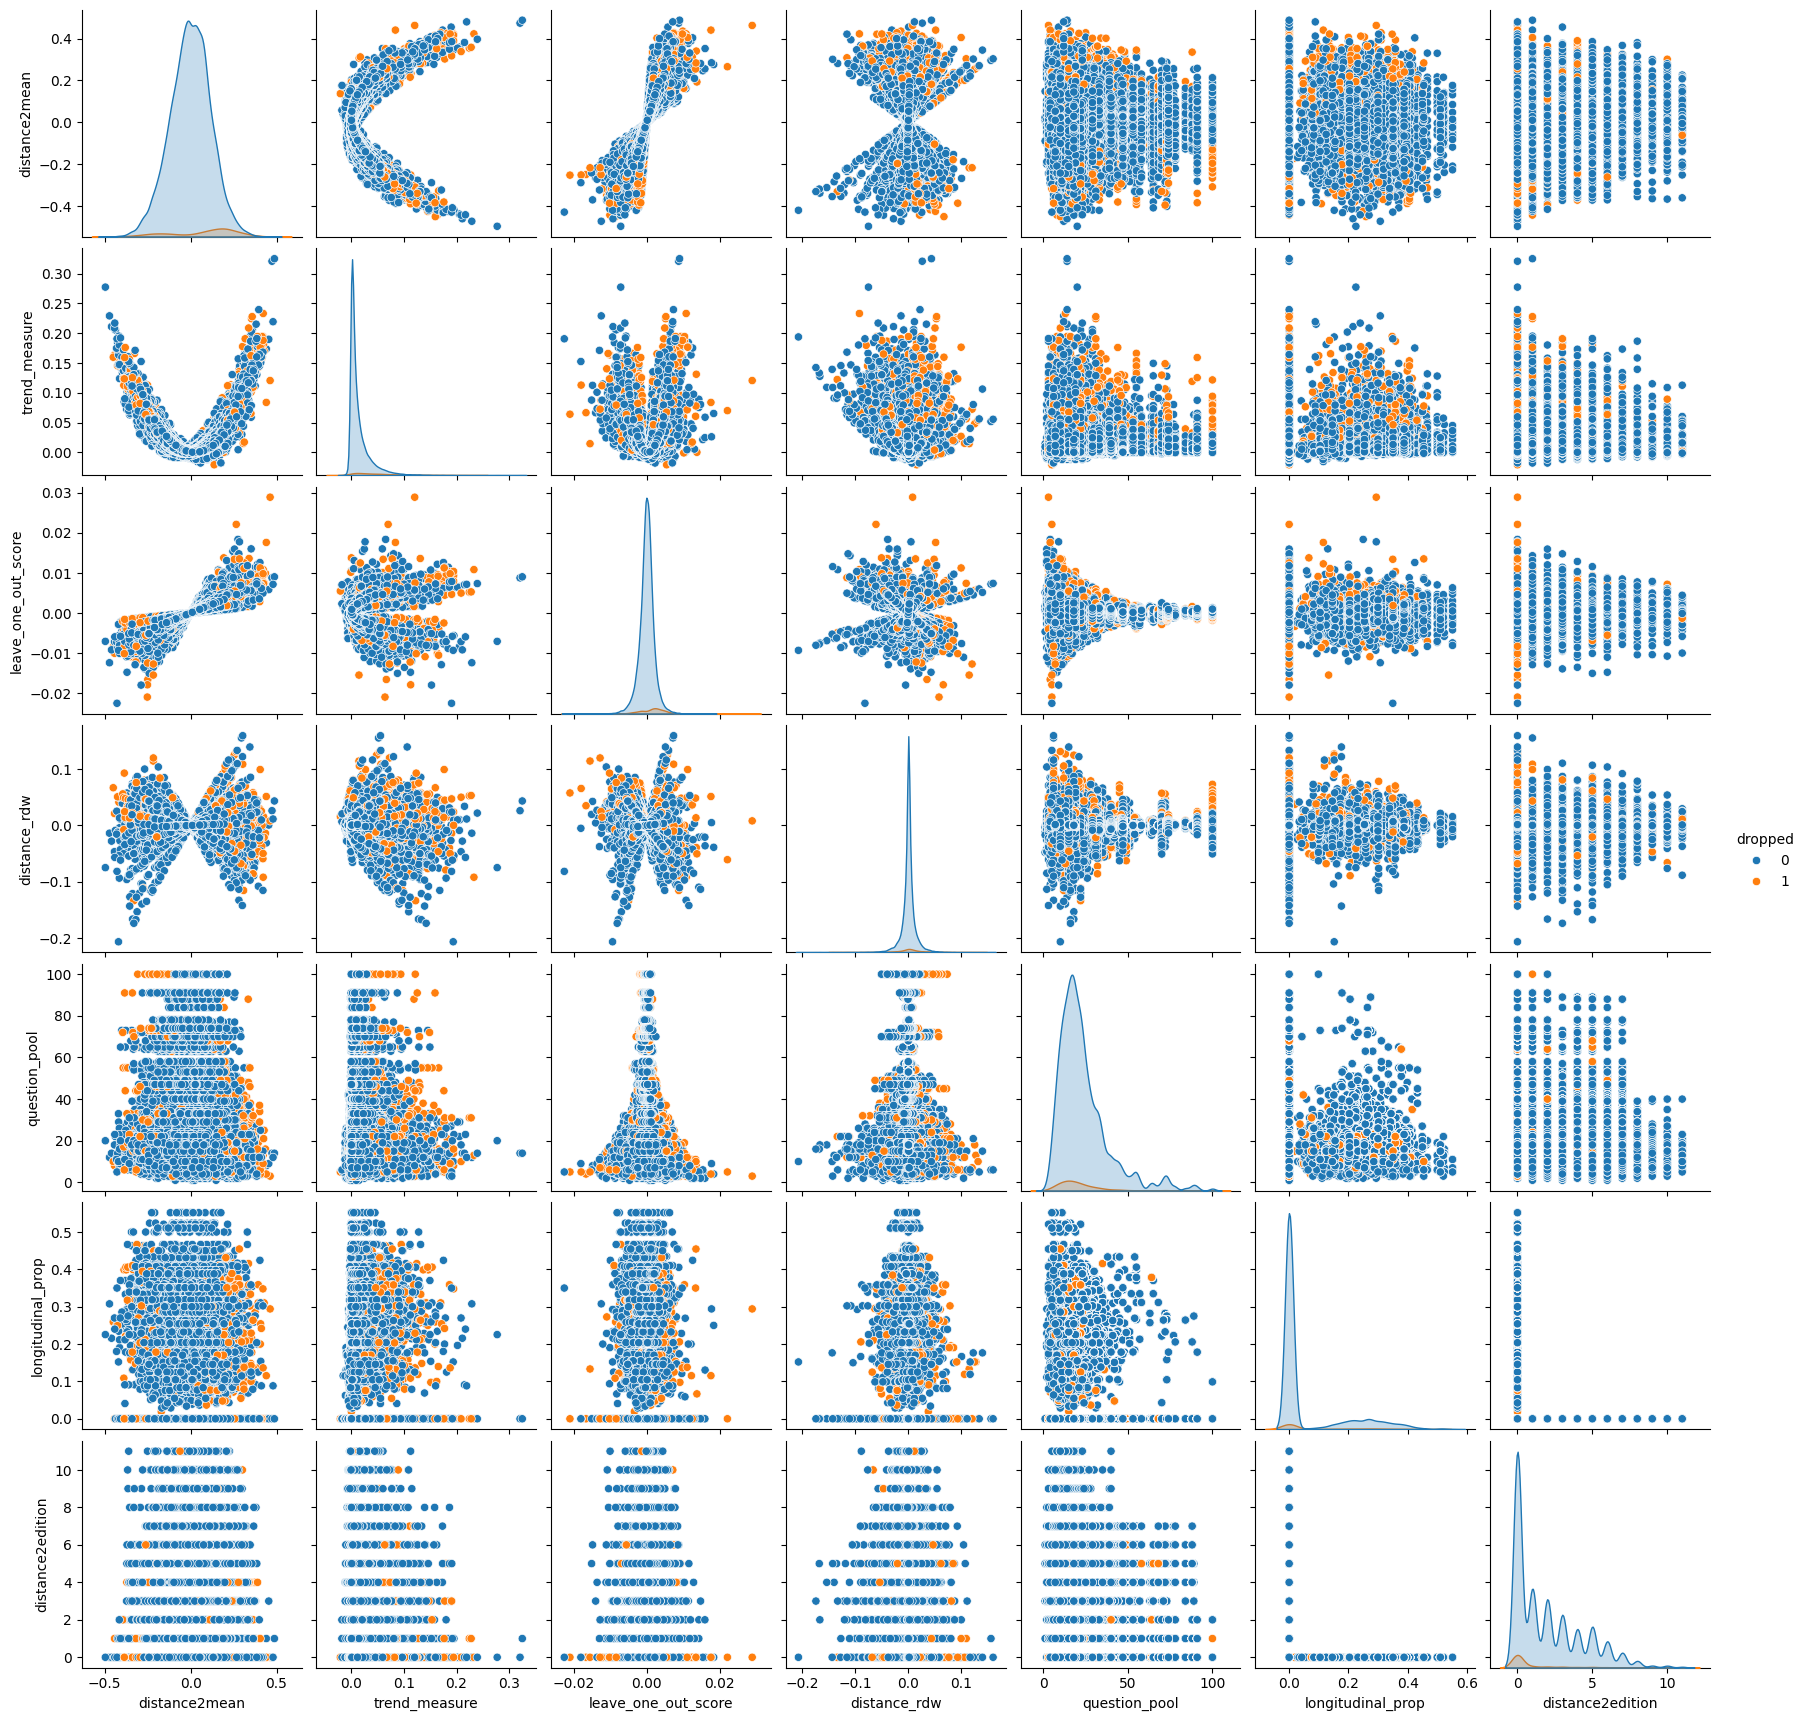

In [10]:
sns.pairplot(features_data[['dropped']+features], hue='dropped')

<Axes: >

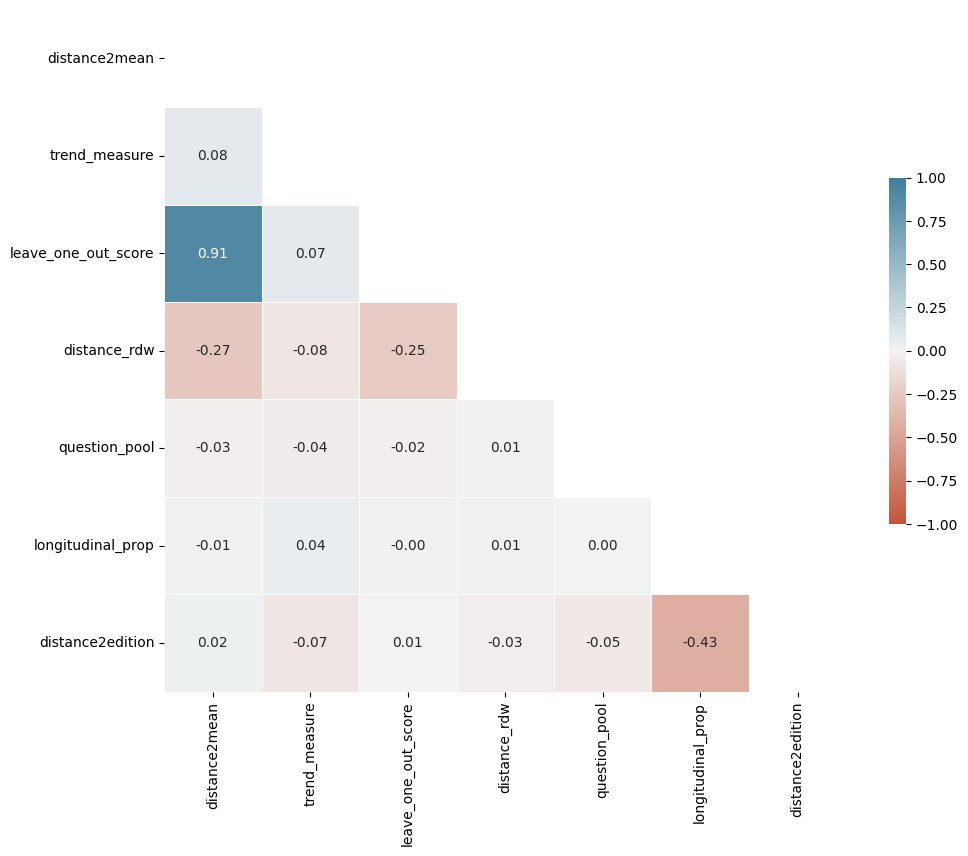

In [17]:
corr = features_data[features].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(20, 230, as_cmap=True)
sns.heatmap(
    corr, mask=mask, cmap=cmap, vmax=1, center=0, vmin=-1,
    square=True, linewidths=.5, cbar_kws={"shrink": .5},
    annot=True, fmt=".2f"
)